In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

Data Exploration

In [6]:
df = pd.read_csv("sample_data/diabetes_sample_100.csv")

In [7]:
print("Missing values:\n" , df.isnull().sum())

Missing values:
 Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64


In [8]:
print("Basic Statistics :\n",df.describe())

Basic Statistics :
        Pregnancies     Glucose  BloodPressure        BMI         Age  Outcome
count   100.000000  100.000000     100.000000  100.00000  100.000000   100.00
mean      7.270000  136.770000      69.550000   35.01600   48.750000     0.45
std       4.251809   39.121116      17.524226    9.28473   18.818847     0.50
min       0.000000   70.000000      40.000000   18.50000   18.000000     0.00
25%       3.750000  104.750000      56.500000   27.40000   33.000000     0.00
50%       7.000000  132.000000      70.500000   35.60000   49.000000     0.00
75%      11.000000  170.500000      85.500000   43.40000   66.000000     1.00
max      14.000000  199.000000      99.000000   49.70000   79.000000     1.00


In [9]:
print("\nAnomalies:")
print("Glucose :",(df["Glucose"]==0).sum())
print("Blood Pressure :",(df["BloodPressure"]==0).sum())
print("BMI :",(df["BMI"]==0).sum())


Anomalies:
Glucose : 0
Blood Pressure : 0
BMI : 0


Data Preprocessing

In [10]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Text(0.5, 1.0, 'Glucose by outcome')

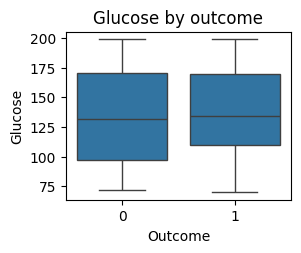

In [11]:
# Glucose vs Outcome
plt.subplot(2 ,2 ,2)
sns.boxplot(x="Outcome",y="Glucose",data = df)
plt.title("Glucose by outcome")

Text(0.5, 1.0, 'Age by Outcome')

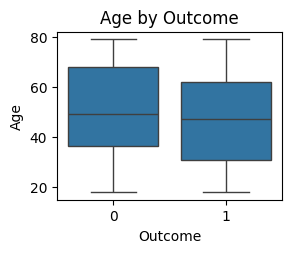

In [12]:
# Age vs Outcome
plt.subplot(2,2,3)
sns.boxplot(x="Outcome",y="Age",data = df)
plt.title("Age by Outcome")

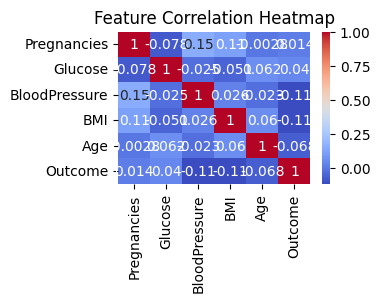

In [13]:
plt.subplot(2,2,4)
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

models = {
    "Logistic Regression" :LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42)
}

print("\n⚙️ Model Performance:\n")
best_model = None
best_score = 0

print("Model Performance\n")
for name , model in models.items():
  model.fit(x_train,y_train)
  y_pred =  model.predict(x_test)
  acc = accuracy_score(y_test , y_pred)
  prec = precision_score(y_test , y_pred)
  rec = recall_score(y_test , y_pred)
  print(f"{name}: Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}")

  if acc > best_score:
        best_score = acc
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, "model.pkl")
print(f"\n✅ Best model saved: {best_model_name} (Accuracy={best_score:.2f})")


⚙️ Model Performance:

Model Performance

Logistic Regression: Accuracy=0.50, Precision=0.44, Recall=0.44
Decision Tree: Accuracy=0.75, Precision=0.75, Recall=0.67
Random Forest: Accuracy=0.60, Precision=0.57, Recall=0.44

✅ Best model saved: Decision Tree (Accuracy=0.75)


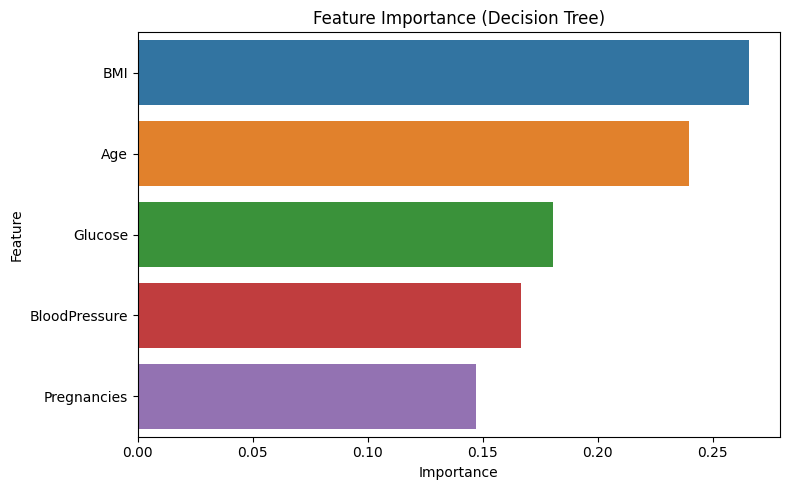

In [15]:
if best_model_name in ["Random Forest", "Decision Tree"]:
    importances = best_model.feature_importances_
    features = df.columns[:-1]
    importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Plot Feature Importances
    plt.figure(figsize=(8, 5))
    sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Feature", legend=False)
    plt.title(f"Feature Importance ({best_model_name})")
    plt.tight_layout()
    plt.show()